In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import time


In [2]:
start = time.time()

In [3]:
#por el momento abro copia de ~50.000 rows para que corra mas rapido
archivo="ALUMNOS-trainData.csv"

In [4]:
datos=pd.read_csv(archivo)

In [5]:
datos.info()
#departure_time tiene espacios blancos, no creo que se pueda estimar valores faltantes
#sugiero eliminar obsevación o variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999890 non-null  int64  
 1   date             999890 non-null  object 
 2   fligth_number    999890 non-null  int64  
 3   origin           999890 non-null  object 
 4   destination      999890 non-null  object 
 5   distance         999890 non-null  int64  
 6   noshow           999890 non-null  float64
 7   denied_boarding  999890 non-null  int64  
 8   pax_midlow       999890 non-null  int64  
 9   pax_high         999890 non-null  int64  
 10  pax_midhigh      999890 non-null  int64  
 11  pax_low          999890 non-null  int64  
 12  pax_freqflyer    999890 non-null  int64  
 13  group_bookings   999890 non-null  int64  
 14  out_of_stock     999890 non-null  int64  
 15  dom_cnx          999890 non-null  int64  
 16  int_cnx          999890 non-null  int6

In [6]:
#elimino observaciones que tengan la variable departure_time en blanco
datos.dropna(subset=['departure_time'],inplace=True)

In [7]:
#primera columna tiene variables tipo int64, pero no se sabe cual es su significado, por lo que se borra
datos.drop(datos.columns[[0]],inplace=True, axis=1)

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998472 entries, 0 to 999889
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             998472 non-null  object 
 1   fligth_number    998472 non-null  int64  
 2   origin           998472 non-null  object 
 3   destination      998472 non-null  object 
 4   distance         998472 non-null  int64  
 5   noshow           998472 non-null  float64
 6   denied_boarding  998472 non-null  int64  
 7   pax_midlow       998472 non-null  int64  
 8   pax_high         998472 non-null  int64  
 9   pax_midhigh      998472 non-null  int64  
 10  pax_low          998472 non-null  int64  
 11  pax_freqflyer    998472 non-null  int64  
 12  group_bookings   998472 non-null  int64  
 13  out_of_stock     998472 non-null  int64  
 14  dom_cnx          998472 non-null  int64  
 15  int_cnx          998472 non-null  int64  
 16  p2p              998472 non-null  int6

In [9]:
datos.isna().sum().sort_values()

date               0
capacity           0
departure_time     0
p2p                0
int_cnx            0
dom_cnx            0
out_of_stock       0
group_bookings     0
pax_freqflyer      0
revenues_usd       0
pax_low            0
pax_high           0
pax_midlow         0
denied_boarding    0
noshow             0
distance           0
destination        0
origin             0
fligth_number      0
pax_midhigh        0
bookings           0
dtype: int64

In [10]:
datos

,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,28,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,5,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,7,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,18,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,2009-10-16,6024,UDI,CGH,552,5.0,0,25,12,20,...,12,0,0,64,9,0,15:14:00,144.0,14102.1,73
999886,2009-05-03,6669,LIM,HAV,3934,4.0,0,129,3,19,...,2,20,0,0,118,156,08:50:00,168.0,32907.8,274
999887,2011-04-04,9094,IQQ,SCL,1430,5.0,0,2,1,0,...,20,36,0,7,0,124,14:18:00,218.0,13519.3,131
999888,2009-04-04,7704,GYE,SCY,1091,2.0,0,67,2,7,...,16,0,0,34,2,98,08:05:00,144.0,8729.6,134


In [11]:
#info relevante sobre los datos numericos
datos.select_dtypes(include=['float64', 'int']).describe()

,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
count,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000,998472.000000
mean,6111.700900,1461.144915,6.017665,0.047518,75.512378,3.807592,6.319921,57.210294,16.798194,3.833313,0.096365,25.805089,26.702750,107.140540,178.057943,14840.654495,159.648379
std,2048.460199,1684.658558,5.111705,0.544812,44.573728,7.247980,10.267712,38.402214,13.835132,12.305842,0.295092,32.195638,43.942971,65.514668,32.689218,17965.509547,68.619310
min,10.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,-77206.900000,1.000000
25%,5383.000000,551.000000,3.000000,0.000000,46.000000,0.000000,0.000000,29.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,150.000000,6289.775000,110.000000
50%,6037.000000,916.000000,5.000000,0.000000,77.000000,1.000000,3.000000,55.000000,14.000000,0.000000,0.000000,12.000000,5.000000,99.000000,174.000000,9696.000000,151.000000
75%,7190.000000,1672.000000,8.000000,0.000000,104.000000,4.000000,8.000000,82.000000,23.000000,0.000000,0.000000,42.000000,31.000000,147.000000,174.000000,15736.300000,200.000000
max,9264.000000,11380.000000,271.000000,53.000000,344.000000,195.000000,230.000000,296.000000,236.000000,240.000000,1.000000,246.000000,357.000000,564.000000,451.000000,335775.400000,608.000000


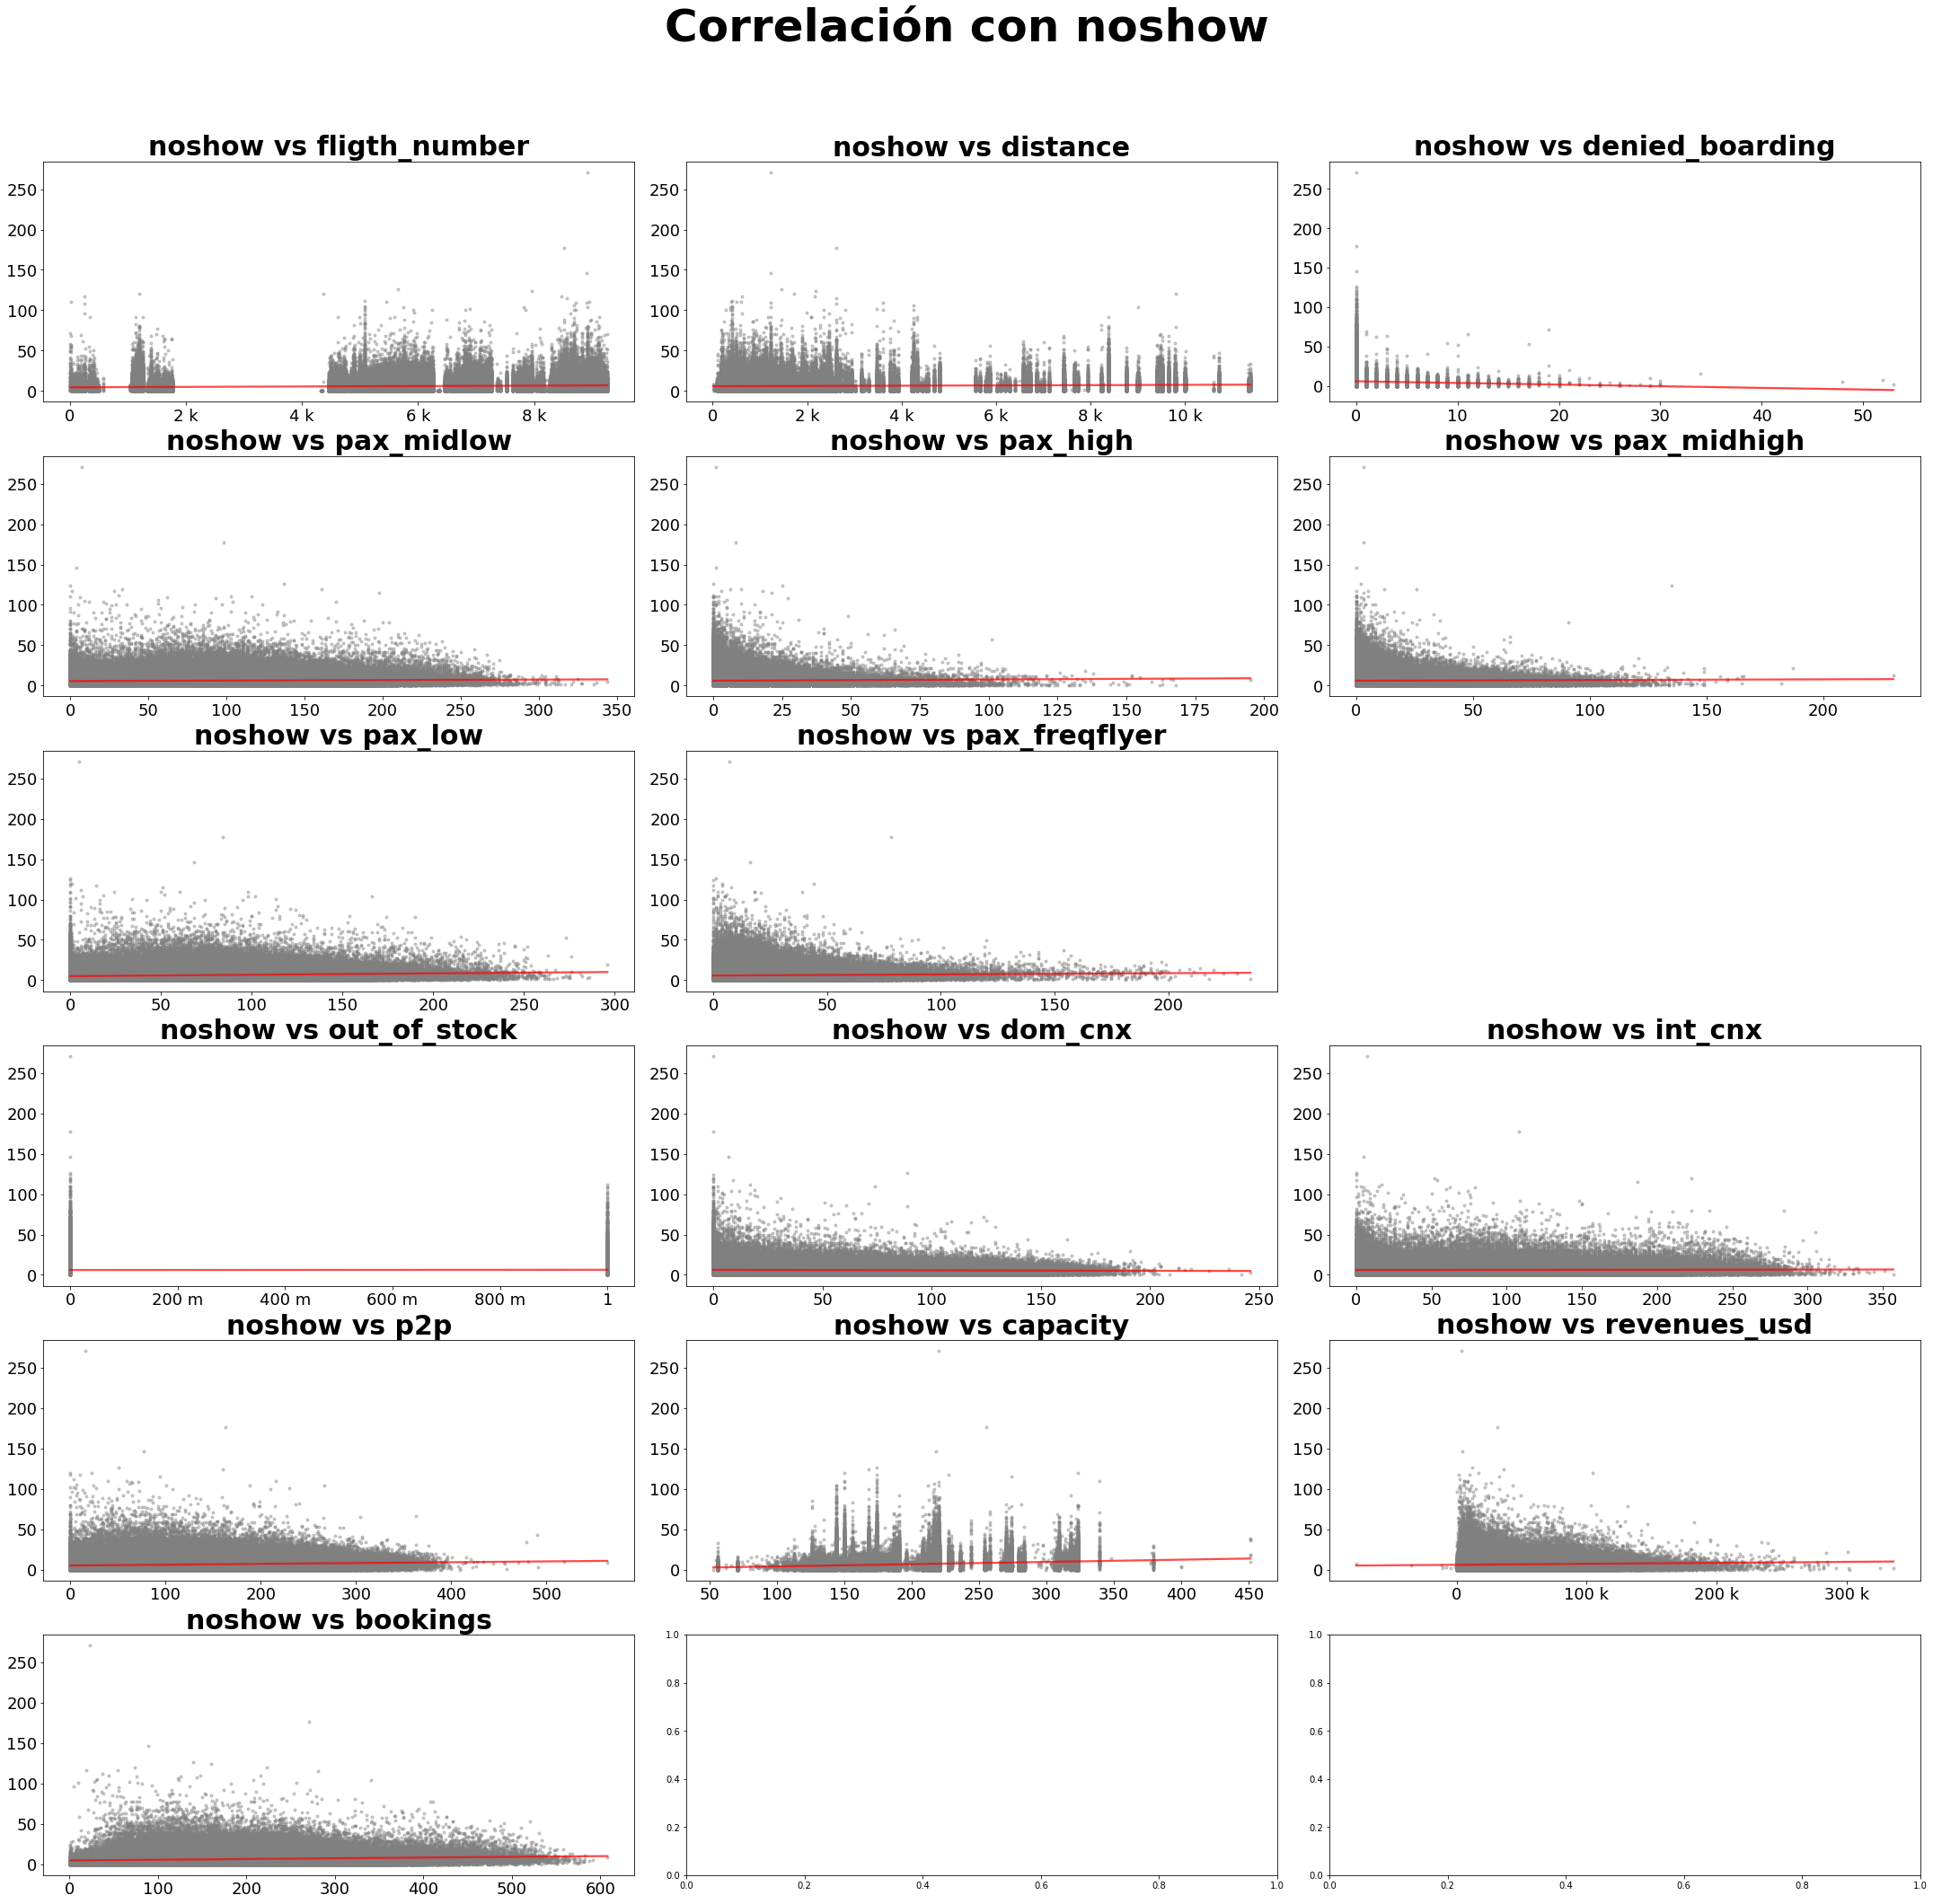

In [12]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30, 30))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('noshow')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['noshow'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"noshow vs {colum}", fontsize = 30,color='black', fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con noshow\n', fontsize = 50,color='black', fontweight = "bold");

In [13]:
#suena para avisarme que termino de correr el programa
import os
duration = 3 # seconds
freq = 300 # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

0

In [14]:
end = time.time()
tiempo=end-start
print(f'Tiempo en ejecutar: {tiempo/60} minutos')


Tiempo en ejecutar: 39.50455516576767 minutos
